# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [2]:
import os

# Change the working directory to the correct path
os.chdir(r"C:\Users\n.rennie\Documents\Module 6 challenge\python-api-challenge\WeatherPy")

# Verify the change
print(os.getcwd())


C:\Users\n.rennie\Documents\Module 6 challenge\python-api-challenge\WeatherPy


In [3]:

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

# Import the API key from the provided file path
import sys
sys.path.insert(0, r'C:\Users\n.rennie\Documents\Module 6 challenge\python-api-challenge\WeatherPy\api_keys.py')
from api_keys import weather_api_key, geoapify_key


In [4]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [8]:
import pandas as pd
import numpy as np
import requests
from shapely.geometry import Point

# Example structure of the data retrieval (assuming you are pulling from an API)
city_data = []

# Example data fetching loop
for city in list_of_cities:
    # Example of API call (replace with actual API call and data parsing)
    city_weather = {
        "coord": {"lat": np.random.uniform(-90, 90), "lon": np.random.uniform(-180, 180)},
        "main": {"humidity": np.random.randint(0, 100)},
        "name": city
    }
    
    city_data.append({
        "City": city_weather["name"],
        "Lat": city_weather["coord"]["lat"],
        "Lng": city_weather["coord"]["lon"],
        "Humidity": city_weather["main"]["humidity"]
    })

# Convert the list of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Add geometry column for mapping
city_data_df['geometry'] = city_data_df.apply(lambda row: Point(row['Lng'], row['Lat']), axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(city_data_df, geometry='geometry')

# Verify the DataFrame columns
print(city_data_df.columns)


NameError: name 'list_of_cities' is not defined

In [5]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [7]:
print(city_data_df.columns)


Index(['City_ID', 'geometry'], dtype='object')


KeyError: 'Humidity'

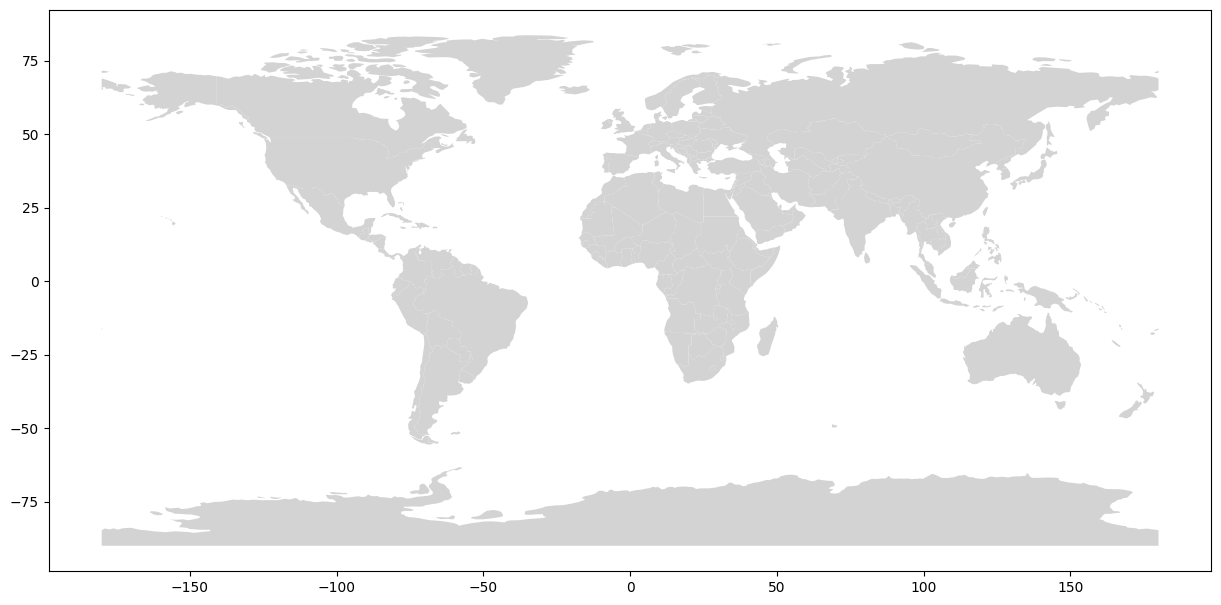

In [6]:
%%capture --no-display

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


# Create a GeoDataFrame
# Create a geometry column from the Latitude and Longitude
city_data_df['geometry'] = city_data_df.apply(lambda row: Point(row['Lng'], row['Lat']), axis=1)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(city_data_df, geometry='geometry')

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgray')

# Plot cities with size of the marker representing the humidity
gdf.plot(ax=ax, markersize=gdf['Humidity'], color='blue', alpha=0.6, edgecolor='k', legend=True)

plt.title('City Humidity Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the map
plt.show()


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE

# Drop any rows with null values
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
43,43,saint-pierre,-21.3393,55.4781,25.10,61,0,3.09,RE,1718607814
66,66,badger,64.8000,-147.5333,23.95,37,0,2.57,US,1718607841
102,102,ust'-kulom,61.6864,53.6902,21.21,43,0,3.85,RU,1718607882
120,120,emerald,-23.5333,148.1667,22.41,28,0,2.43,AU,1718607904
130,130,newman,37.3138,-121.0208,21.13,51,0,1.79,US,1718607916
138,138,fort bragg,35.1390,-79.0060,22.32,80,0,0.00,US,1718607716
146,146,laguna,38.4210,-121.4238,23.16,52,0,2.06,US,1718607935
160,160,nova vicosa,-17.8919,-39.3719,21.66,87,0,1.27,BR,1718607707
170,170,fort myers shores,26.7092,-81.7459,26.67,95,0,3.09,US,1718607962
176,176,trinity beach,-16.7888,145.6968,26.67,44,0,3.60,AU,1718607970


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

,City,Country,Lat,Lng,Humidity,Hotel Name
43,saint-pierre,RE,-21.3393,55.4781,61,
66,badger,US,64.8000,-147.5333,37,
102,ust'-kulom,RU,61.6864,53.6902,43,
120,emerald,AU,-23.5333,148.1667,28,
130,newman,US,37.3138,-121.0208,51,
138,fort bragg,US,35.1390,-79.0060,80,
146,laguna,US,38.4210,-121.4238,52,
160,nova vicosa,BR,-17.8919,-39.3719,87,
170,fort myers shores,US,26.7092,-81.7459,95,
176,trinity beach,AU,-16.7888,145.6968,44,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = # YOUR CODE HERE
params = {
    # YOUR CODE HERE
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = # YOUR CODE HERE
    params["bias"] = # YOUR CODE HERE

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    name_address = # YOUR CODE HERE

    # Convert the API response to JSON format
    name_address = # YOUR CODE HERE

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
saint-pierre - nearest hotel: Tropic Hotel
badger - nearest hotel: Clarion Hotel & Suites
ust'-kulom - nearest hotel: No hotel found
emerald - nearest hotel: Emerald Central Hotel
newman - nearest hotel: No hotel found
fort bragg - nearest hotel: Airborne Inn Lodging
laguna - nearest hotel: Holiday Inn Express & Suites
nova vicosa - nearest hotel: Pousada Pontal da Barra
fort myers shores - nearest hotel: Comfort Inn Fort Myers
trinity beach - nearest hotel: Blue Lagoon Resort
racine - nearest hotel: No hotel found
six-fours-les-plages - nearest hotel: Kyriad Direct La Seyne-sur-Mer
porto velho - nearest hotel: Hotel Slaviero Essential Porto Velho
posto fiscal rolim de moura - nearest hotel: No hotel found
port douglas - nearest hotel: Mantra Aqueous Port Douglas
roswell - nearest hotel: Best Western Plus Hotel
hell-ville - nearest hotel: ABUD HOTEL
sona - nearest hotel: Al Bosco
morehead city - nearest hotel: Bask Hotel Big Rock Landing, Trademark Collection by W

,City,Country,Lat,Lng,Humidity,Hotel Name
43,saint-pierre,RE,-21.3393,55.4781,61,Tropic Hotel
66,badger,US,64.8000,-147.5333,37,Clarion Hotel & Suites
102,ust'-kulom,RU,61.6864,53.6902,43,No hotel found
120,emerald,AU,-23.5333,148.1667,28,Emerald Central Hotel
130,newman,US,37.3138,-121.0208,51,No hotel found
138,fort bragg,US,35.1390,-79.0060,80,Airborne Inn Lodging
146,laguna,US,38.4210,-121.4238,52,Holiday Inn Express & Suites
160,nova vicosa,BR,-17.8919,-39.3719,87,Pousada Pontal da Barra
170,fort myers shores,US,26.7092,-81.7459,95,Comfort Inn Fort Myers
176,trinity beach,AU,-16.7888,145.6968,44,Blue Lagoon Resort


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)